## **03-03 N-gram 언어 모델(N-gram Language Model)**
---

n-gram 언어 모델은 여전히 **카운트에 기반한 통계적 접근** 을 사용하고 있으므로 **SLM(Statistical Language Model)** 의 일종입니다. 다만, 앞서 배운 언어 모델과는 달리 이전에 등장한 모든 단어를 고려하는 것이 아니라 **일부 단어만 고려하는 접근 방법** 을 사용합니다. 그리고 이때 일부 단어를 **몇 개** 보느냐를 결정하는데 이것이 n-gram에서의 `n`이 가지는 의미입니다.

---
### **1. 코퍼스에서 카운트하지 못하는 경우의 감소.**
  
**SLM의 한계** 는 **훈련 코퍼스에 확률을 계산하고 싶은 문장이나 단어가 없을 수 있다** 는 점입니다. 그리고 확률을 계산하고 싶은 문장이 길어질수록 갖고있는 코퍼스에서 그 문장이 존재하지 않을 가능성이 높습니다. 다시 말하면 카운트할 수 없을 가능성이 높습니다. 그런데 다음과 같이 **참고하는 단어들을 줄이면** 카운트를 할 수 있을 가능성을 높일 수 있습니다.  
  
$P(\text{is|An adorable little boy}) \approx\ P(\text{is|boy})$  

가령, An adorable little boy가 나왔을 때 is가 나올 확률을 그냥 boy가 나왔을 때 is가 나올 확률로 생각해보는 건 어떨까요? 갖고있는 코퍼스에 An adorable little boy is가 있을 가능성 보다는 boy is라는 더 짧은 단어 시퀀스가 존재할 가능성이 더 높습니다. 조금 지나친 일반화로 느껴진다면 아래와 같이 little boy가 나왔을 때 is가 나올 확률로 생각하는 것도 대안입니다.
  
$P(\text{is|An adorable little boy}) \approx\ P(\text{is|little boy})$
  


즉, 앞에서는 **An adorable little boy가 나왔을 때 is가 나올 확률** 을 구하기 위해서는 An adorable little boy가 나온 횟수와 An adorable little boy is가 나온 횟수를 카운트해야만 했지만, 이제는 단어의 확률을 구하고자 기준 단어의 앞 단어를 전부 포함해서 카운트하는 것이 아니라, **앞 단어 중 임의의 개수만 포함해서 카운트하여 근사하자** 는 것입니다. 이렇게 하면 갖고 있는 코퍼스에서 해당 단어의 시퀀스를 카운트할 확률이 높아집니다.

---
### **2. N-gram**

  이때 임의의 개수를 정하기 위한 기준을 위해 사용하는 것이 n-gram입니다. **n-gram은 n개의 연속적인 단어 나열** 을 의미합니다. 갖고 있는 **코퍼스에서 n개의 단어 뭉치 단위로 끊어서 이를 하나의 토큰으로 간주** 합니다. 예를 들어서 문장 An adorable little boy is spreading smiles이 있을 때, 각 n에 대해서 n-gram을 전부 구해보면 다음과 같습니다.

**uni**grams : an, adorable, little, boy, is, spreading, smiles  
**bi**grams : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles  
**tri**grams : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles
**4**-grams : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles

n-gram을 사용할 때는 n이 1일 때는 유니그램(unigram), 2일 때는 바이그램(bigram), 3일 때는 트라이그램(trigram)이라고 명명하고 n이 4 이상일 때는 gram 앞에 그대로 숫자를 붙여서 명명합니다. 출처에 따라서는 유니그램, 바이그램, 트라이그램 또한 각각 1-gram, 2-gram, 3-gram이라고 하기도 합니다. n-gram을 이용한 언어 모델을 설계해보겠습니다.

n-gram을 통한 언어 모델에서는 **다음에 나올 단어의 예측은 오직 n-1개의 단어에만 의존** 합니다. 예를 들어 'An adorable little boy is spreading' 다음에 나올 단어를 예측하고 싶다고 할 때, n=4라고 한 4-gram을 이용한 언어 모델을 사용한다고 합시다. 이 경우, spreading 다음에 올 단어를 예측하는 것은 n-1에 해당되는 앞의 3개의 단어만을 고려합니다.



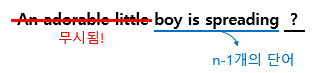

$$P(w\text{|boy is spreading}) = \frac{\text{count(boy is spreading}\ w)}{\text{count(boy is spreading)}}$$

만약 갖고있는 코퍼스에서 boy is spreading가 1,000번 등장했다고 합시다. 그리고 boy is spreading insults가 500번 등장했으며, boy is spreading smiles가 200번 등장했다고 합시다. 그렇게 되면 boy is spreading 다음에 insults가 등장할 확률은 50%이며, smiles가 등장할 확률은 20%입니다. 확률적 선택에 따라 우리는 insults가 더 맞다고 판단하게 됩니다.

$$P(\text{insults|boy is spreading}) = 0.500$$  
$$P(\text{smiles|boy is spreading}) = 0.200$$

---
### **3. N-gram Language Model의 한계**

앞서 4-gram을 통한 언어 모델의 동작 방식을 확인했습니다. 그런데 조금 의문이 남습니다. 앞서 본 4-gram 언어 모델은 주어진 문장에서 앞에 있던 단어인 '작고 사랑스러운(an adorable little)'이라는 수식어를 제거하고, 반영하지 않았습니다. 그런데 '작고 사랑스러운' 수식어까지 모두 고려하여 작고 사랑하는 소년이 하는 행동에 대해 다음 단어를 예측하는 언어 모델이었다면 과연 '작고 사랑스러운 소년이' '모욕을 퍼트렸다'라는 부정적인 내용이 '웃음 지었다'라는 긍정적인 내용 대신 선택되었을까요?

물론 코퍼스 데이터를 어떻게 가정하느냐의 나름이고, 전혀 말이 안 되는 문장은 아니지만 여기서 지적하고 싶은 것은 **n-gram은 앞의 단어 몇 개만 보다 보니 의도하고 싶은 대로 문장을 끝맺음하지 못하는 경우가 생긴다** 는 점입니다. 문장을 읽다 보면 **앞 부분과 뒷부분의 문맥이 전혀 연결 안 되는 경우도 생길 수** 있습니다. 결론만 말하자면, 전체 문장을 고려한 언어 모델보다는 정확도가 떨어질 수밖에 없습니다. 이를 토대로 n-gram 모델에 대한 한계점을 정리해보겠습니다.

#### **(1) 희소 문제(Sparsity Problem)**

문장에 존재하는 앞에 나온 단어를 모두 보는 것보다 일부 단어만을 보는 것으로 현실적으로 코퍼스에서 카운트 할 수 있는 확률을 높일 수는 있었지만, n-gram 언어 모델도 여전히 n-gram에 대한 희소 문제가 존재합니다.
  
#### **(2) n을 선택하는 것은 trade-off 문제.**

앞에서 몇 개의 단어를 볼지 n을 정하는 것은 trade-off가 존재합니다. 임의의 개수인 n을 1보다는 2로 선택하는 것은 거의 대부분의 경우에서 언어 모델의 성능을 높일 수 있습니다. 가령, spreading만 보는 것보다는 is spreading을 보고 다음 단어를 예측하는 것이 더 정확하기 때문입니다. 이 경우 훈련 데이터가 적절한 데이터였다면 언어 모델이 적어도 spreading 다음에 동사를 고르지 않을 것입니다.

**n을 크게 선택하면** 실제 훈련 코퍼스에서 해당 n-gram을 카운트할 수 있는 확률은 적어지므로 **희소 문제는 점점 심각** 해집니다. 또한 n이 커질수록 **모델 사이즈가 커진다** 는 문제점도 있습니다. 기본적으로 코퍼스의 모든 n-gram에 대해서 카운트를 해야 하기 때문입니다.

**n을 작게 선택하면** 훈련 코퍼스에서 카운트는 잘 되겠지만 **근사의 정확도는 현실의 확률분포와 멀어집니다.** 그렇기 때문에 적절한 n을 선택해야 합니다. 앞서 언급한 trade-off 문제로 인해 정확도를 높이려면 **n은 최대 5를 넘게 잡아서는 안 된다고 권장** 되고 있습니다.

n이 성능에 영향을 주는 것을 확인할 수 있는 유명한 예제 하나를 보겠습니다. 스탠퍼드 대학교의 공유 자료에 따르면, 월스트리트 저널에서 3,800만 개의 단어 토큰에 대하여 n-gram 언어 모델을 학습하고, 1,500만 개의 테스트 데이터에 대해서 테스트를 했을 때 다음과 같은 성능이 나왔다고 합니다. 뒤에서 배우겠지만, **펄플렉서티(perplexity)는 수치가 낮을수록 더 좋은 성능** 을 나타냅니다.

|	|Unigram	|Bigram	|Trigram    |  
|---|---|---|---|  
|**Perplexity** 	|962	|170	|109    |  

위의 결과는 n을 1에서 2, 2에서 3으로 올릴 때마다 성능이 올라가는 것을 보여줍니다.

---
### **4. 적용 분야(Domain)에 맞는 코퍼스의 수집**

어떤 분야인지, 어떤 어플리케이션인지에 따라서 특정 단어들의 확률 분포는 당연히 다릅니다. 가령, 마케팅 분야에서는 마케팅 단어가 빈번하게 등장할 것이고, 의료 분야에서는 의료 관련 단어가 당연히 빈번하게 등장합니다. 이 경우 언어 모델에 사용하는 코퍼스를 해당 도메인의 코퍼스를 사용한다면 당연히 언어 모델이 제대로 된 언어 생성을 할 가능성이 높아집니다.

때로는 이를 언어 모델의 약점이라고 하는 경우도 있는데, **훈련에 사용된 도메인 코퍼스가 무엇이냐** 에 따라서 성능이 비약적으로 달라지기 때문입니다.

---
### **5. 인공 신경망을 이용한 언어 모델(Neural Network Based Language Model)**

여기서는 다루지 않겠지만, N-gram Language Model의 한계점을 극복하기위해 분모, 분자에 숫자를 더해서 카운트했을 때 0이 되는 것을 방지하는 등의 여러 **일반화(generalization)** 방법들이 존재합니다. 하지만 그럼에도 **본질적으로 n-gram 언어 모델에 대한 취약점을 완전히 해결하지는 못하였고,** 이를 위한 대안으로 N-gram Language Model보다 대체적으로 **성능이 우수한 인공 신경망을 이용한 언어 모델이 많이 사용** 되고 있습니다.



마지막 편집일시 : 2022년 11월 14일 2:44 오후